## Linear Model

Start with packages

In [115]:
import matplotlib.pyplot as plot
import numpy as np
import random
from random import gauss, randint, uniform
from scipy import stats
from sklearn.decomposition import PCA

Set constants.

Set *masterSeed* to None to make every run different.  Set it to an integer to repeat to get 
the sam results over and over.

Sigma represents the amount of additive noise in the output.

In [107]:
nGene = 4
nSamp = 100

masterSeed = None  

sigma = 0.1

#### Set up the problem

The model assumes that of each gene:
1. Contributors something to the final output
2. That the contributions are additive.
3. That the contributions of each gene are independent of each other.

Writing this model as an algebraic shows that this is equivalent to assuming "the linear model".

In [25]:
if masterSeed is not None:
	seed = masterSeed
else:
	random.seed()
	seed = randint(0, 999)
	
random.seed(seed)
print(f'Seed = {seed}')

Seed = 830


In [26]:
nGene = 4

weight = [uniform(-1,1) for _ in range(nGene)]
print(f'weights = {weight}')

varName = ['x'+str(i) for i in range(nGene)]

weights = [-0.7885815994771888, 0.5237690245176625, -0.44925232231825096, 0.6362077562232531]


Make a callable function for this model.

In [84]:
termStr = [f'{weight[i]}*x{i}' for i in range(nGene)]
funcStr = f'sum(({','.join(f'{weight[i]}*x{i}' for i in range(nGene))}))'
print(f'funcStr = {funcStr}')

linModFunc = lambda x0,x1,x2,x3: eval(funcStr)
print(f'Sum of weights check:  {linModFunc(1,1,1,1)} = {sum(weight)}')

funcStr = sum((-0.7885815994771888*x0,0.5237690245176625*x1,-0.44925232231825096*x2,0.6362077562232531*x3))
Sum of weights check:  -0.07785714105452413 = -0.07785714105452413


Assume that each gene (or perhaps SNIP) occurs in the population with a fixed proportion, not 
necessarily 1/2.

In [27]:
prev = [uniform(0,1) for _ in range(nGene)]
print(f'Prevalence = {prev}')

Gene prevalence = [0.27060841353522047, 0.8409336853401432, 0.7260718346937711, 0.6393870983862727]


Generate samples

In [86]:
geneSamp = tuple(tuple(uniform(0,1) < p for p in prev) for _ in range(nSamp))
print(f'1st sample = {geneSamp[0]}')
print(f'2nd sample = {geneSamp[1]}')

1st sample = (False, True, False, True)
2nd sample = (False, True, False, True)


In [43]:
geneNum = tuple(tuple(1 if hasGene else 0 for hasGene in samp) for samp in geneSamp)
print(f'1st sample = {geneNum[0]}')
print(f'2nd sample = {geneNum[1]}')

1st sample = (1, 1, 0, 0)
2nd sample = (0, 1, 0, 1)


Generate synthetic measurements

In [108]:
meas = tuple(linModFunc(*gn) + gauss(0,sigma) for gn in geneNum)
print(f'1st sample = {meas[0]}')
print(f'2nd sample = {meas[1]}')

1st sample = -0.17251718232955673
2nd sample = 0.9940777932225174


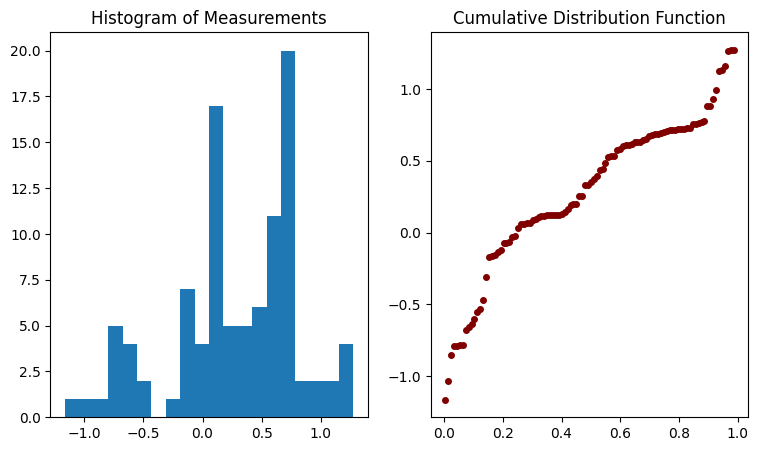

In [133]:
fig, (ax0,ax1) = plot.subplots(1,2, figsize=(9,5))

ax0.hist(meas,bins=20)
ax0.title.set_text('Histogram of Measurements')

x = [(k + 0.5)/(nSamp + 1) for k in range(nSamp)]
ax1.plot(x,sorted(meas), 'o', ms=4, c='maroon')
ax1.title.set_text('Cumulative Distribution Function')

#### Learn Module from (i.e., Fit Model to) the Data

In [138]:
x = np.array(geneNum)
y = np.array(meas)
print(f'x shape = {x.shape}, y shape = {y.shape}')

x shape = (100, 4), y shape = (100,)


In [139]:
pca = PCA()
pca.fit(x,y)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.34636652 0.2770628  0.197937   0.17863368]
[5.0201223  4.48988743 3.79498302 3.60518888]
